<a href="https://colab.research.google.com/github/geologist8268/M-Nawaz/blob/master/Growing_Season_Length.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import ee
import geemap
import xarray as xr
!pip install xee
import xee

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 18.5 MB/s eta 0:00:00


In [4]:
ee.Authenticate(auth_mode='notebook')
ee.Initialize(
    project = 'researchlmi',
    opt_url = 'https://earthengine-highvolume.googleapis.com'
)

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/cloud-platform%20https%3A//www.googleapis.com/auth/drive%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=MD8l5aUc2x5AjG6yr44NvoE1FiyYCHMWZ8zPOPOyDf0&tc=Vf6PAUzaN_WCV4OUkdUlqywBaHp9jiuxqQjtCjtVbnY&cc=w9dKDn_uamBqQ9wx9slhz5rAe3NmmbcILQzmJK3cARM

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AVGzR1C-BzROl8Acg79i0m5i9XXlkXouf4opt_OZukFMt_FGRZNTxf3_g60

Successfully saved authorization token.


In [13]:
# Create a map centered on a location
map = geemap.Map(center=[30.2, 67.0], zoom=8)

#map = geemap.Map(basemap = 'SATELLITE')
# Overlay labels using the 'HYBRID' basemap (roads + place names)
#map.add_basemap('HYBRID')
#map = geemap.Map(basemap='HYBRID')
map.add_basemap('Google Hybrid')
map

Basemap can only be one of the following:
  OpenStreetMap
  Esri.WorldStreetMap
  Esri.WorldImagery
  Esri.WorldTopoMap
  FWS NWI Wetlands
  FWS NWI Wetlands Raster
  NLCD 2021 CONUS Land Cover
  NLCD 2019 CONUS Land Cover
  NLCD 2016 CONUS Land Cover
  NLCD 2013 CONUS Land Cover
  NLCD 2011 CONUS Land Cover
  NLCD 2008 CONUS Land Cover
  NLCD 2006 CONUS Land Cover
  NLCD 2004 CONUS Land Cover
  NLCD 2001 CONUS Land Cover
  USGS NAIP Imagery
  USGS NAIP Imagery False Color
  USGS NAIP Imagery NDVI
  USGS Hydrography
  USGS 3DEP Elevation
  ESA Worldcover 2020
  ESA Worldcover 2020 S2 FCC
  ESA Worldcover 2020 S2 TCC
  ESA Worldcover 2021
  ESA Worldcover 2021 S2 FCC
  ESA Worldcover 2021 S2 TCC
  BaseMapDE.Color
  BaseMapDE.Grey
  BasemapAT.basemap
  BasemapAT.grau
  BasemapAT.highdpi
  BasemapAT.orthofoto
  BasemapAT.overlay
  BasemapAT.surface
  BasemapAT.terrain
  CartoDB.DarkMatter
  CartoDB.DarkMatterNoLabels
  CartoDB.DarkMatterOnlyLabels
  CartoDB.Positron
  CartoDB.PositronNoLa

Map(center=[30.2, 67.0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=SearchDataGUI(…

In [14]:
roi = map.draw_last_feature.geometry()

roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Feature.geometry",
    "arguments": {
      "feature": {
        "functionInvocationValue": {
          "functionName": "Feature",
          "arguments": {
            "geometry": {
              "functionInvocationValue": {
                "functionName": "GeometryConstructors.Polygon",
                "arguments": {
                  "coordinates": {
                    "constantValue": [
                      [
                        [
                          66.817263,
                          29.988007
                        ],
                        [
                          66.817263,
                          30.301524
                        ],
                        [
                          67.171469,
                          30.301524
                        ],
                        [
                          67.171469,
                          29.988007
                        ],
                        [
                          66.817263,
                          29.988007
                        ]
                      ]
                    ]
                  },
                  "geodesic": {
                    "constantValue": false
                  }
                }
              }
            }
          }
        }
      }
    }
  }
})

In [15]:
collection = ee.ImageCollection("ECMWF/ERA5_LAND/DAILY_AGGR").filterDate('2000','2024').select('temperature_2m').map(
    lambda img: img.subtract(273.15).copyProperties(img, img.propertyNames())
)


In [16]:
collection.limit(10)

In [17]:
ds = xr.open_dataset(collection, engine = 'ee', crs = 'EPSG:4326', scale = 0.1, geometry = roi)

In [18]:
ds

<xarray.Dataset> Size: 491kB
Dimensions:         (time: 8766, lon: 4, lat: 3)
Coordinates:
  * time            (time) datetime64[ns] 70kB 2000-01-01 ... 2023-12-31
  * lon             (lon) float64 32B 66.87 66.97 67.07 67.17
  * lat             (lat) float64 24B 30.04 30.14 30.24
Data variables:
    temperature_2m  (time, lon, lat) float32 421kB ...
Attributes:
    crs:      EPSG:4326

In [19]:
xr.infer_freq(ds.time)

'D'

In [20]:
ds['temperature_2m'].attrs['units']  = 'degC'

In [21]:
ds

<xarray.Dataset> Size: 491kB
Dimensions:         (time: 8766, lon: 4, lat: 3)
Coordinates:
  * time            (time) datetime64[ns] 70kB 2000-01-01 ... 2023-12-31
  * lon             (lon) float64 32B 66.87 66.97 67.07 67.17
  * lat             (lat) float64 24B 30.04 30.14 30.24
Data variables:
    temperature_2m  (time, lon, lat) float32 421kB ...
Attributes:
    crs:      EPSG:4326

In [22]:
!pip install xclim
import xclim

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.4/378.4 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.2/194.2 kB 15.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.5/76.5 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 22.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.9/57.9 kB 3.9 MB/s eta 0:00:00


In [23]:
gsl = xclim.indices.growing_season_length(
    tas = ds.temperature_2m,
    thresh = '5.0 degC',
    window = 6,
    mid_date = '05-01',
    freq = 'YS'
)

In [24]:
gsl

<xarray.DataArray 'length' (time: 24, lon: 4, lat: 3)> Size: 2kB
array([[[366., 366., 366.],
        [366., 366., 366.],
        [366., 366., 366.],
        [366., 310., 310.]],

       [[320., 320., 351.],
        [353., 352., 353.],
        [351., 320., 320.],
        [320., 320., 306.]],

       [[356., 356., 365.],
        [365., 356., 356.],
        [356., 356., 356.],
        [356., 336., 331.]],

       [[356., 356., 361.],
        [362., 362., 362.],
        [358., 356., 344.],
        [348., 333., 294.]],

...

       [[295., 295., 307.],
        [295., 295., 295.],
        [295., 295., 292.],
        [301., 293., 268.]],

       [[354., 354., 354.],
        [354., 354., 354.],
        [354., 354., 354.],
        [354., 354., 334.]],

       [[312., 312., 338.],
        [325., 325., 338.],
        [325., 311., 311.],
        [326., 304., 297.]],

       [[334., 333., 361.],
        [361., 361., 361.],
        [361., 361., 322.],
        [361., 322., 322.]]])
Coordinates:
  * time     (time) datetime64[ns] 192B 2000-01-01 2001-01-01 ... 2023-01-01
  * lon      (lon) float64 32B 66.87 66.97 67.07 67.17
  * lat      (lat) float64 24B 30.04 30.14 30.24
Attributes:
    long_name:    Length of the season.
    description:  Number of steps of the original series in the season, betwe...
    units:        d

In [25]:
import matplotlib.pyplot as plt

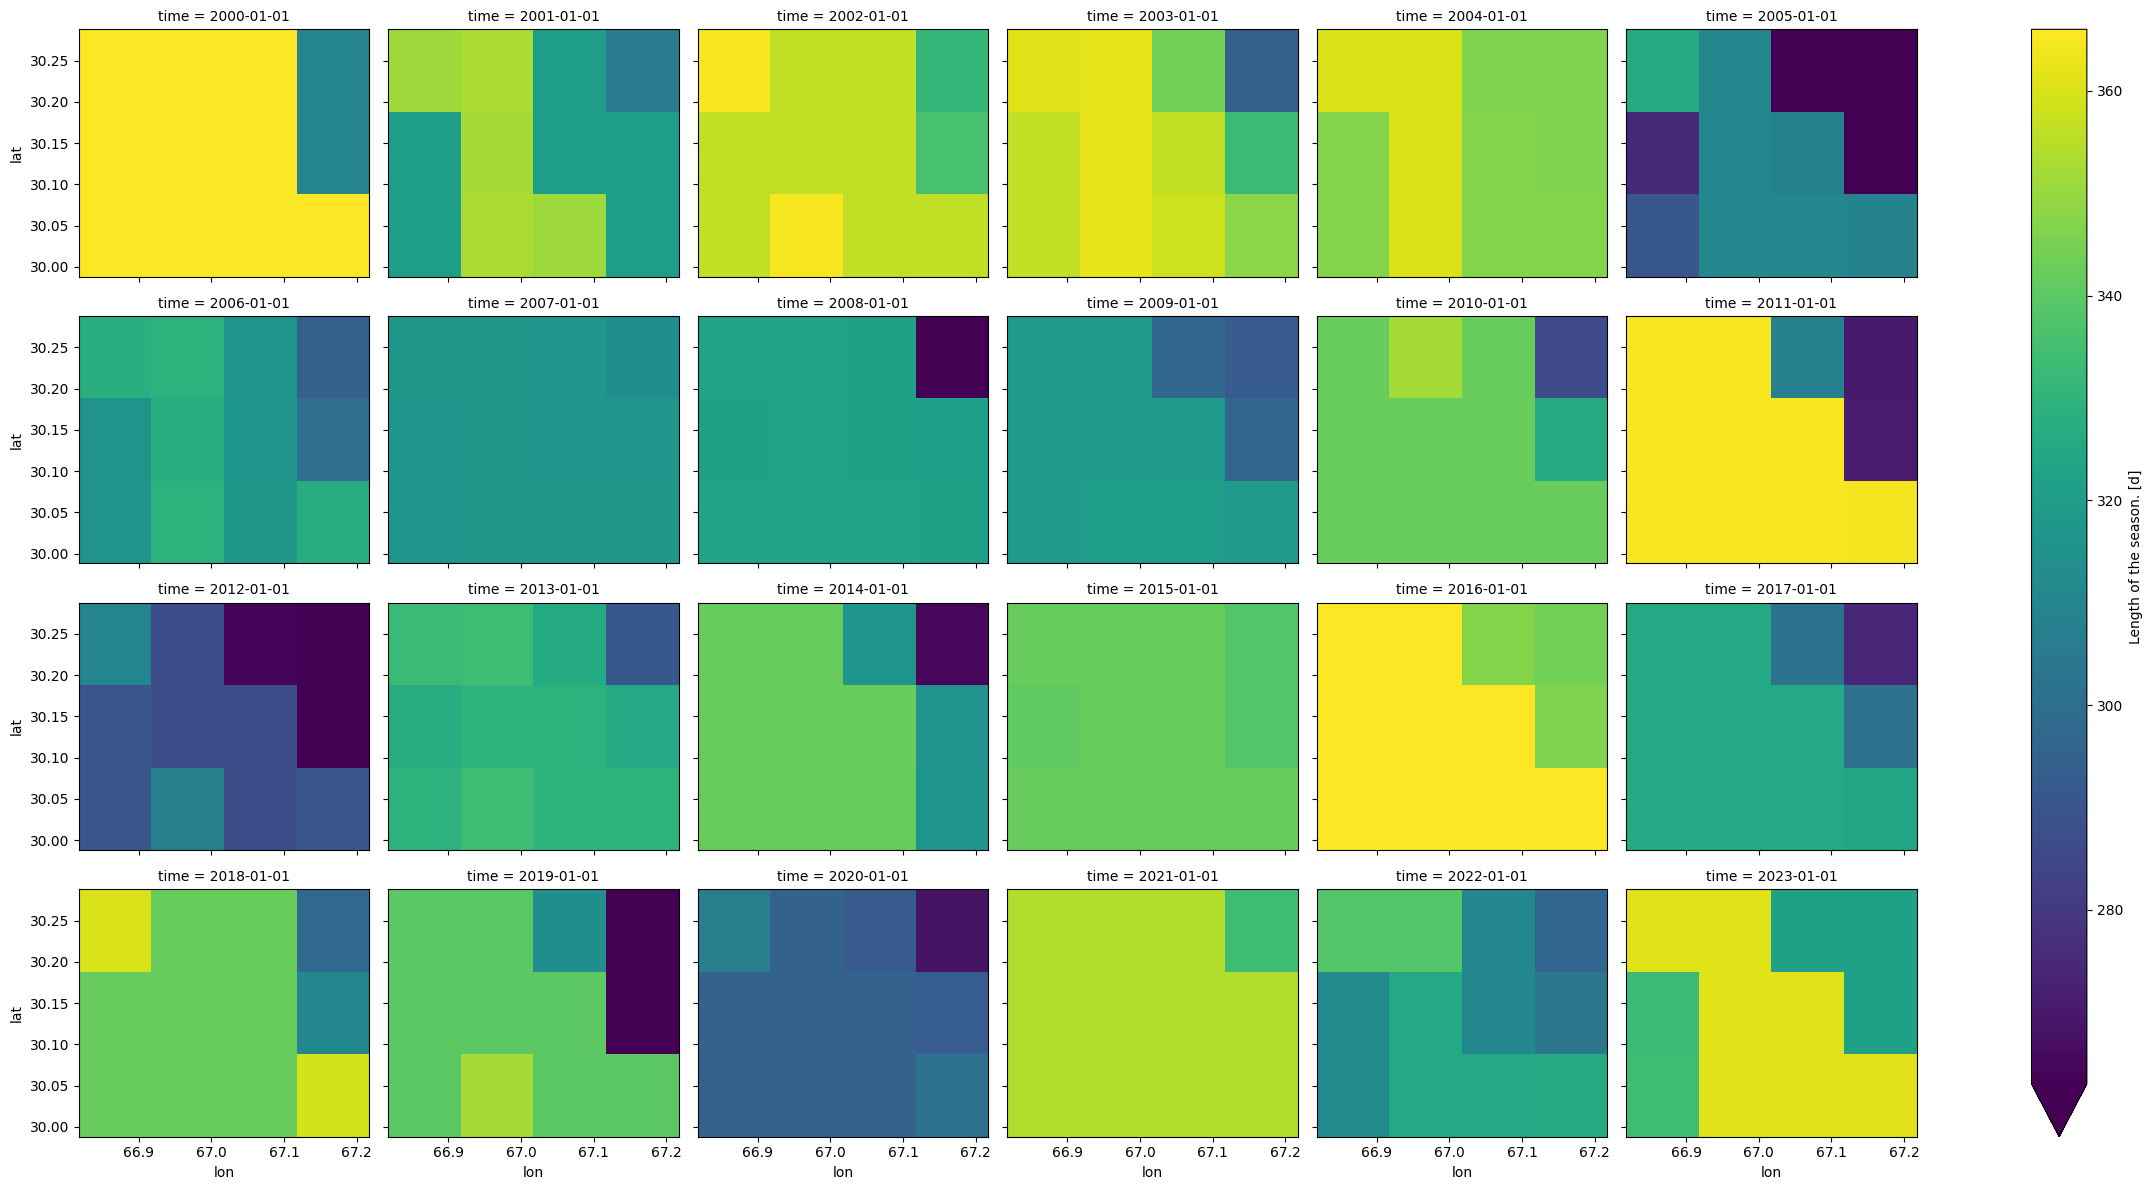

In [32]:
gsl.plot(x = 'lon', y = 'lat', col = 'time', col_wrap = 6, robust = True,figsize=(24, 12))   # adjust width and height as needed
plt.savefig('gsl.png', dpi = 360, bbox_inches = 'tight')
